In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import random
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import talos

np.random.seed(123)

In [2]:
test_folder = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/phase_4/chest_xray/test'
train_folder = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/phase_4/chest_xray/train'
val_folder = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/phase_4/chest_xray/val'

In [3]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(80, 80),
        batch_size = 624,
        class_mode='binary') 

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(80, 80),
        batch_size= 5216,
        class_mode='binary')

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(80, 80),
        batch_size = 16,
        class_mode='binary')



Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(5216, 80, 80, 3)
(624, 80, 80, 3)
(16, 80, 80, 3)
(5216,)
(624,)
(16,)


In [6]:
train_generator.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
test_generator.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
val_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

In [14]:
print(train_img.shape)
print(test_img.shape)

(5216, 19200)
(624, 19200)


In [15]:
train_y = np.reshape(train_labels[:], (5216,1))
test_y = np.reshape(test_labels[:], (624,1))
print(test_y.shape)
print(train_y.shape)

(624, 1)
(5216, 1)


Label: 0.0


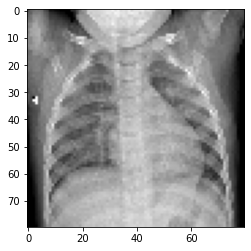

In [16]:
sample_image = train_images[0]
sample_label = train_labels[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

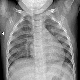

In [14]:
array_to_img(train_images[0])

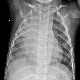

In [15]:
array_to_img(train_images[10])

In [17]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(5216, 80, 80, 3)
(624, 80, 80, 3)
(16, 80, 80, 3)
(5216,)
(624,)
(16,)


In [18]:
print(train_img.shape)
print(test_img.shape)
print(train_y.shape)
print(test_y.shape)

(5216, 19200)
(624, 19200)
(5216, 1)
(624, 1)


In [19]:
model = Sequential()


model.add(layers.Dense(100, activation= 'relu',input_dim= 19200,))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',
                  optimizer= 'adam',
                  metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1920100   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 1,920,201
Trainable params: 1,920,201
Non-trainable params: 0
_________________________________________________________________


In [22]:
history= model.fit(train_img, train_y, 
                             batch_size= 50, 
                              epochs=10, 
                              validation_data=(test_img, test_y),
                               verbose= 1)

Epoch 1/10
105/105 [==============================] - 1s 9ms/step - loss: 0.8050 - accuracy: 0.8252 - val_loss: 0.5242 - val_accuracy: 0.7548
Epoch 2/10
105/105 [==============================] - 1s 6ms/step - loss: 0.1734 - accuracy: 0.9350 - val_loss: 0.9476 - val_accuracy: 0.6827
Epoch 3/10
105/105 [==============================] - 1s 6ms/step - loss: 0.1906 - accuracy: 0.9239 - val_loss: 0.4849 - val_accuracy: 0.8013
Epoch 4/10
105/105 [==============================] - 1s 6ms/step - loss: 0.1267 - accuracy: 0.9523 - val_loss: 0.7141 - val_accuracy: 0.7532
Epoch 5/10
105/105 [==============================] - 1s 6ms/step - loss: 0.1281 - accuracy: 0.9551 - val_loss: 0.3760 - val_accuracy: 0.8285
Epoch 6/10
105/105 [==============================] - 1s 6ms/step - loss: 0.1359 - accuracy: 0.9486 - val_loss: 0.6510 - val_accuracy: 0.7756
Epoch 7/10
105/105 [==============================] - 1s 6ms/step - loss: 0.1360 - accuracy: 0.9469 - val_loss: 0.6349 - val_accuracy: 0.7853
Epoch 

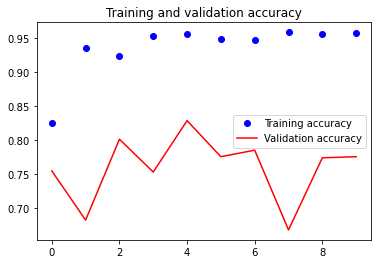

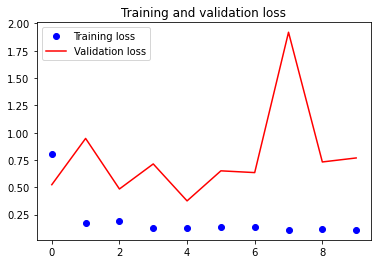

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()